# <center> <img src="https://miro.medium.com/max/700/1*0OVev9mGkNJblfkOxkknAQ.png"> </center>

<div class="alert alert-block alert-info">  
<h1><strong>Introduction</strong></h1>
    <p>Millions of people are using Twitter and expressing their emotions like happiness, sadness, angry, etc. The Sentiment analysis is also about detecting the emotions, opinion, assessment, attitudes, and took this into consideration as a way humans think. Sentiment analysis classifies the emotions into classes such as positive or negative. Nowadays, industries are interested to use textual data for semantic analysis to extract the view of people about their products and services. Sentiment analysis is very important for them to know the customer satisfaction level and they can improve their services accordingly. To work on the text data, they try to extract the data from social media platforms. There are a lot of social media sites like Google Plus, Facebook, and Twitter that allow expressing opinions, views, and emotions about certain topics and events. Microblogging site Twitter is expanding rapidly among all other online social media networking sites with about 200 million users. Twitter was founded in 2006 and currently, it is the most famous microblogging platform. In 2017 2 million users shared 8.3 million tweets in one hour. Twitter users use to post their thoughts, emotions, and messages on their profiles, called tweets. Words limit of a single tweet has 140 characters. Twitter sentiment analysis based on the NLP (natural language processing) field. For tweets text, we use NLP techniques like tokenizing the words, removing the stop words like I, me, my, our, your, is, was, etc. Natural language processing also plays a part to preprocess the data like cleaning the text and removing the special characters and punctuation marks. Sentimental analysis is very important because we can know the trends of people’s emotions on specific topics with their tweets.</p>
    <br>
        <hr>
      <b>Problem description/definition: </b>
    <hr>
<ul>
    <li>To devise a sentimental analyzer for overcoming the challenges to identify the twitter tweets text sentiments (positive, negative) by implementing neural network using tensorflow</li>
</ul>


<hr>
<b>Evolution measures: </b>
<hr>
<ul>
<p> After training the model, we apply the evaluation measures to check that how the model is getting predictions. We will use the following evaluation measures to evaluate the performance of the models:</p>
    <li>Accuracy</li>
    <li>Confusion matrix with plot</li>
    <li>ROC Curve</li>
</ul>
<hr>
<b>Technical Approach</b>
<hr>
<p>We are using python language in the implementations and Jupter Notebook that support the machine learning and data science projects. We will build tensorflow based model. We will use Sentiment 140 dataset and split that data into 70% for training and 30% for the testing purposes. After training on the model, we will evaluate the model to evaluate the performance of trained model</p>

<hr>
<b>Source of Data: </b>
<hr>
 <a href="https://www.kaggle.com/kazanova/sentiment140">https://www.kaggle.com/kazanova/sentiment140</a>
   
</div>

<div class="alert alert-block alert-danger">  
<h2><center><strong>Importing Python Libraries 📕 📗 📘 📙</strong></center></h2>
        
</div>

- Libraries are important and we call them to perform the different actions on our data and for training the models.
- Its a first step to load the library to perform the specific task

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<h4> We are uisng the following versions of the libraries:</h4>

- numpy == 1.18.5

- pandas == 1.1.3

- tensorflow ==1.7.0

- keras == 2.4.3

- nltk ==3.5

- seaborn ==0.11.0

<h4>How we can install the libraries in python?</h4>

<h4>To install the python library is very easy</h4>
- pip install name_of_library
<h5> Like if you wanted to install tensorflow? </h5>
- pip install tensforflow

<div class="alert alert-block alert-danger">  
<h2><center><strong>Loading the data 📁 📂</strong></center></h2>
        
</div>

In [ ]:
data = pd.read_csv("/content/training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1", engine="python")
data.columns = ["label", "time", "date", "query", "username", "text"]

<div class="alert alert-block alert-danger">  
<h2><center><strong>Exploratory data analysis 🔎 📊</strong></center></h2>
        
</div>

#### Five top records of data

In [ ]:
data.head()

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


#### Five last records of data

In [ ]:
data.tail()

,label,time,date,query,username,text
42367,0,1676064993,Fri May 01 21:00:32 PDT 2009,NO_QUERY,lovehaightpeace,I wish Eric Draven was real.
42368,0,1676065032,Fri May 01 21:00:32 PDT 2009,NO_QUERY,bhillss,exam time
42369,0,1676065247,Fri May 01 21:00:34 PDT 2009,NO_QUERY,OxCheliJoxO,is gettin sick! Damn! Go figure I have big wee...
42370,0,1676065305,Fri May 01 21:00:35 PDT 2009,NO_QUERY,exeromai,Had to leave after shooting 1st 3 songs of Dea...
42371,0,1676065473,Fri May 01 21:00:36 PDT 2009,NO_QUERY,trslove,None


#### Coloumns/features in data

In [ ]:
data.columns

Index(['label', 'time', 'date', 'query', 'username', 'text'], dtype='object')

#### Length of data

In [ ]:
print('lenght of data is', len(data))

lenght of data is 42372


#### Shape of data

In [ ]:
data.shape

(42372, 6)

#### Data information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42372 entries, 0 to 42371
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     42372 non-null  int64 
 1   time      42372 non-null  int64 
 2   date      42372 non-null  object
 3   query     42372 non-null  object
 4   username  42372 non-null  object
 5   text      42371 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Data types of all coloumns

In [ ]:
data.dtypes

label        int64
time         int64
date        object
query       object
username    object
text        object
dtype: object

#### Checking Null values

In [ ]:
np.sum(data.isnull().any(axis=1))

1

#### Rows and columns in the dataset

In [ ]:
print('Count of columns in the data is:  ', len(data.columns))

Count of columns in the data is:   6


In [ ]:
print('Count of rows in the data is:  ', len(data))

Count of rows in the data is:   42372


<div class="alert alert-block alert-danger">  
<h1><center><strong>Data Preparation 📝</strong></center></h1>

 <ul style="list-style-type:circle;">
     <h6>
         <li>Selection of interested coloumns</li>
         <br>
          <li>Assinged 1 to class 4</li>
         <br>
          <li>Took one fourth data so we can run on our machine easily</li>
         <br>
          <li>Combined positive and negative tweets</li>
         <br>
    <li>We will convert the text in lower case for the further working on tweet text. </li>
         <br>
         <li>We will clean and remove the stop words(of, a, in etc) from statement because these words are not useuseful to support the labels of sentiments  data</li>
<br>
         <li>We will clean and remove the punctuations because these are the noise in the data and not meaningfull</li>
         <br>
         <li>We will clean and remove repeating characters in the words</li>
         <br>
         <li>We will clean and remove emails</li>
         <br>
         <li>We will clean and remove URL's</li>
         <br>
         <li>We will clean and remove the numbers in the data</li>
         <br>
         <li>We will apply tokenization(to separate the sentence into words)</li>
         <br>
         <li>We will apply stemming and lemmatization on the text. The concept of both is following:</li>
         <img src="https://lh3.googleusercontent.com/3wumK8lGLhKpD2Fhbu35I7wWf6OSpF_erX9T7FX9WQCE5_HBKMJpKOZNximlzlTG5882QUWcL-_lFLJd0-RIo4uHDaO7cK8aEnw2Tm2-5xPwjYS3ls6fYefeGAVGb1WUGrXafJrC">
          <br>
         <li>We will apply stemming on the tweet text.</li>
         <br>
         <li>We will apply lemmatization on the tweet text.</li>
         <br>
         <li>Separated input feature and labels</li>
         <br>
         <li>Extracted features from input feature</li>
         <br>
         <li>Separated the 70% data for training and 30% data for testing</li>
</h6>
</ul>
   
        
</div>

#### Selecting the text and label coloumn

In [ ]:
data=data[['text','label']]

#### Assigning 1 to Positive sentment 4

In [ ]:
data['label'][data['label']==4]=1

#### Separating positive and negative tweets

In [ ]:
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

#### taking one fourth data so we can run on our machine easily

In [ ]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

#### Combining positive and negative tweets

In [ ]:
data = pd.concat([data_pos, data_neg])

#### Making statement text in lower case

In [ ]:
data['text']=data['text'].str.lower()

In [ ]:
data['text'].tail()

19995                            one more day of holidays 
19996    feeling so down right now .. i hate you damn h...
19997    geez,i hv to read the whole book of personalit...
19998    i threw my sign at donnie and he bent over to ...
19999    @heather2711 good thing i didn't find any then...
Name: text, dtype: object

In [ ]:
!pip install stopwords

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Cleaning and removing Stop words of english

In [ ]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

#### Cleaning and removing the above stop words list from the tweet text

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

0    upset can't update facebook texting it... migh...
1    @kenichan dived many times ball. managed save ...
2                     whole body feels itchy like fire
3    @nationwideclass no, behaving all. i'm mad. he...
4                                 @kwesidei whole crew
Name: text, dtype: object

#### Cleaning and removing punctuations

In [ ]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [ ]:
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

19995                                     one day holidays
19996                     feeling right  hate damn humprey
19997    geezi hv read whole book personality types emb...
19998     threw sign donnie bent get thingee made sad face
19999    heather2711 good thing find none ones like com...
Name: text, dtype: object

#### Cleaning and removing repeating characters

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [ ]:
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

#### Cleaning and removing email

In [ ]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

In [ ]:
data['text']= data['text'].apply(lambda x: cleaning_email(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

#### Cleaning and removing URL's

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [ ]:
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

#### Cleaning and removing Numeric numbers

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [ ]:
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather god thing find none ones like come siz...
Name: text, dtype: object

#### Getting tokenization of tweet text

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)

In [ ]:
data['text'].head()

0    [upset, cant, update, facebok, texting, it, mi...
1    [kenichan, dived, many, times, bal, managed, s...
2               [whole, body, fels, itchy, like, fire]
3    [nationwideclas, no, behaving, al, im, mad, he...
4                              [kwesidei, whole, crew]
Name: text, dtype: object

#### Applying Stemming

In [ ]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

data['text']= data['text'].apply(lambda x: stemming_on_text(x))

In [ ]:
data['text'].head()

0    [upset, cant, update, facebok, texting, it, mi...
1    [kenichan, dived, many, times, bal, managed, s...
2               [whole, body, fels, itchy, like, fire]
3    [nationwideclas, no, behaving, al, im, mad, he...
4                              [kwesidei, whole, crew]
Name: text, dtype: object

In [ ]:

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#### Applying Lemmatizer

In [ ]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))

In [ ]:
data['text'].head()

<b> <h3> Labels : </h3></b>  labels are the targets like in this project senitments of the tweets are labels.

<b> <h3> Inputs : </h3></b>  Inputs are the data that we feed into machine learning like in this project tweets texts are the inputs.

<b> <h3> Training Data </h3></b>  We use training data when we train the models. We feed train data to machine learning and deep learning models so that model can learn from the data.

<b> <h3> Validation Data </h3></b>  We use validation data while training the model. We use this data to evalaute the performance that how the model perform on training time.

<b> <h3> Testing Data </h3></b>  We use testing data after training the model. We use this data to evalaute the performance that how the model perform after training. So in this way first we get predictions from the trained model without giving the labels and then we compare the true labels with predictions and get the performance of th model..

####  Separating input feature and label

In [ ]:
X=data.text
y=data.label

#### Preparing the input features for training
- We converting the text words into arrays form.
- Maximum 500 features/words selected for training. These 500 words will be selected on the importance that will distinguish between the positive tweets and negative tweets.

In [ ]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

As we can see that there total 40000 tweets and the number words/features are 500.

In [ ]:
sequences_matrix.shape

(20000, 500)

#### Separating the 70% data for training data and 30% for testing data

As we prepared all the tweets, now we are separating/splitting the tweets into training data and testing data.
- 70% tweets will be used in the training
- 30% tweets will be used to test the performance of the model.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

<div class="alert alert-block alert-danger">  
<h2><center><strong>Implementing Tensorflow based model for training 🧪</strong></center></h2>   
</div>

<h4> Step 1</h4>
- The input to model is 500 words because these are the number features/words that we extracted above from text of tweets.

<h4> Step 2</h4>
- Embeddings provide the presentation of words and their relative meanings. Like in this, we are feeding the limit of maximum words, lenght of input words and the inputs of previous layer.

<h4> Step 3</h4>
- LSTM (long short term memory) save the words and predict the next words based on the previous words. LSTM is a sequance predictor of next coming words.

<img src="https://static.wixstatic.com/media/3eee0b_969c1d3e8d7943f0bd693d6151199f69~mv2.gif">
<h4> Ref: https://static.wixstatic.com/media/3eee0b_969c1d3e8d7943f0bd693d6151199f69~mv2.gif </h4>

<h4> Step 4</h4>
- Dense layer reduce the outputs by getting inputs from Faltten layer. Dense layer use all the inputs of previous layer neurons and perform calculations and send 256 outputs

<h4> Step 5</h4>
- Activation function is node that is put at the end of all layers of neural network model or in between neural network layers. Activation function help to decide which neuron should be pass and which neuron should fire. So activation function of node defines the output of that node given an input or set of inputs.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*mcJfRvd9zarAbkHppFRrCQ.gif">
<h4> Ref: https://miro.medium.com/v2/resize:fit:1400/1*mcJfRvd9zarAbkHppFRrCQ.gif </h4>

<h4> Step 6</h4>
- Droupout layer drop some neurons from previous layers. why we apply this? We apply this to avoid the overfitting problems. In overfitting, model give good accuracy on training time but not good on testing time.
<img src="https://i.imgur.com/a86utxY.gif">
<h4> Ref: https://i.imgur.com/a86utxY.gif </h4>

In [ ]:
def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dense(256,name='FC1')(layer) #step4
    layer = Activation('relu')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
    return model #function returning the value when we call it

# Model compilation

- First we are calling the model
- We are using 2 classes so we set "binary_crossentropy" and if we use more than two classes then we use "categorical_crossentropy"
- Optimizer is a function that used to change the features of neural network such as learning rate (how the model learn with features) in order to reduce the losses. So the learning rate of neural network to reduce the losses is defined by optimizer.
- We are setting metrics=accuracy because we are going to caluclate the percentage of correct predictions over all predictions on the validation set

In [ ]:
model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

#### Training and validating with parameter tuning
- We are feeding the training data and getting 10% data for validation from training data
* We set the following parameters:
- Batch size =80 so the model take 80 tweets in each iteration and train them. Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration.
- Epochs =6 so the model will train on the data 6 times.Epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed.
- We can choose batch_size, and epochs as we want so the good practice is to set some values and train the model if the model will not give the good results we can change it and then try again for the training of the model. We can repeat this process many time untill we will not get the good results and this process called as parameter tuning.


In [ ]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/6
158/158 [==============================] - 68s 414ms/step - loss: 0.0229 - accuracy: 0.9978 - val_loss: 1.3421e-05 - val_accuracy: 1.0000
Epoch 2/6
158/158 [==============================] - 64s 403ms/step - loss: 1.7230e-05 - accuracy: 1.0000 - val_loss: 4.3938e-06 - val_accuracy: 1.0000
Epoch 3/6
158/158 [==============================] - 64s 405ms/step - loss: 8.4895e-06 - accuracy: 1.0000 - val_loss: 2.4514e-06 - val_accuracy: 1.0000
Epoch 4/6
158/158 [==============================] - 64s 408ms/step - loss: 5.6517e-06 - accuracy: 1.0000 - val_loss: 1.6425e-06 - val_accuracy: 1.0000
Epoch 5/6
158/158 [==============================] - 63s 399ms/step - loss: 4.2093e-06 - accuracy: 1.0000 - val_loss: 1.2123e-06 - val_accuracy: 1.0000
Epoch 6/6
158/158 [==============================] - 63s 401ms/step - loss: 3.3773e-06 - accuracy: 1.0000 - val_loss: 9.4913e-07 - val_accuracy: 1.0000
Training finished !!


<h1> We need to do all the above configurations to train the model. If we will not set all settings correctly then we could not get the desired results.</h1>

#### Testing the Trained model on test data
- Getting predictions/classifying the sentiments (positve/negative) on the test data using trained model.

In [ ]:
accr1 = model.evaluate(X_test,Y_test) #we are starting to test the model here

188/188 [==============================] - 13s 67ms/step - loss: 9.4916e-07 - accuracy: 1.0000


#### Accuracy
- Accuracy is the number of correctly classify tweets from all the tweets of positive and negative.
- For example, if the trained model classify the 70 tweets correct and 30 tweets wrong from total of 100 tweets then the accuracy score will be 70%.
- Accuracy= Total number of correct predictions/Total number of predictions

In [ ]:
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1])) #the accuracy of the model on test data is given below

Test set
  Accuracy: 1.00


#### Getting prediction of the test data and then we will compare the true labels/classes of the data with predictions
- As the model give probabilties so we are setting a threshold 0.5. More than 0.5 will be the positive tweets and lower will be negative tweets

In [ ]:
y_pred = model.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5)

188/188 [==============================] - 13s 68ms/step




confusion matrix


[[6000]]




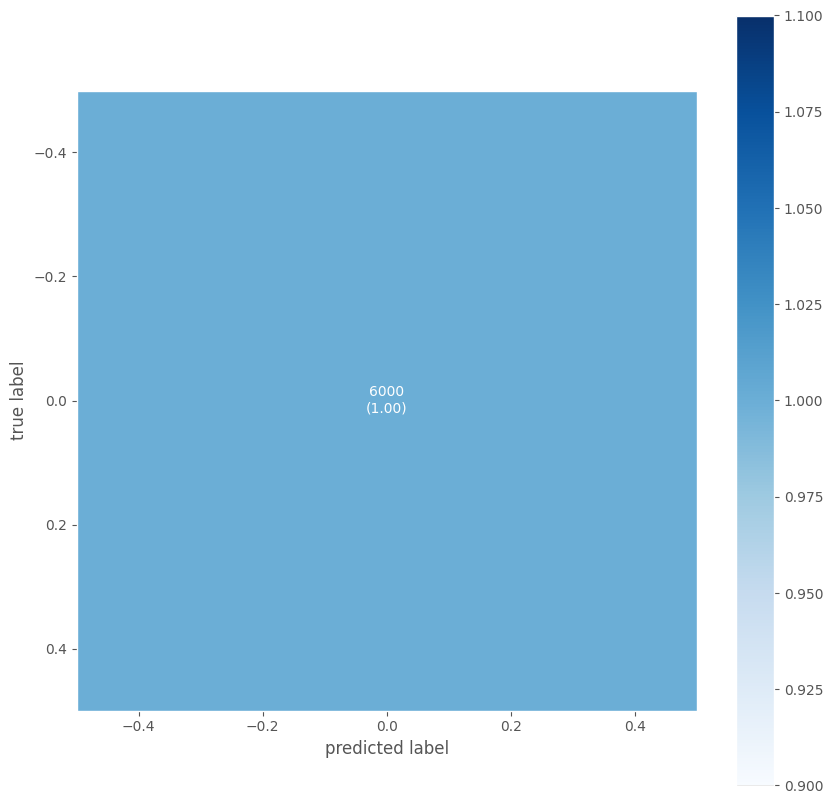

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

<div class="alert alert-block alert-success">  
<h1><center><strong>Conclusion 📝</strong></center></h1>
    <p>
<li>We used the twitter sentiment analysis dataset and explored the data with different ways.</li>
        <li>We prepared the text data of tweets by removing the unnecessary things.</li>
          <li>We trained model based on tensorflow with all settings. </li>
        <li>We evaluated thye model with different evaluation measures.</li>
         <li>If you are interested to work on any text based project, you can simply apply the same methodolgy but might be you will need to change little settings like name of coloumns etc.</li>
        <li>We worked on the classification problem and sepcifically we call it binary classification which is two class classification.</li>
        </p>
</div>